In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import itertools
import pandas as pd
from scipy import stats
from scipy.interpolate import interp1d
from Advertising.environment.Advertising_Config_Manager import *
from Pricing.Pricing_Config_Manager import *

## Conversion Rate plots
The conversion rate of each class can be modified from the configuration file, changing the matrix of probabilities. <br>
We have decided these as default conversion rates because they best represent the will of different types of users to purchase the product at the various price tags. 

In [2]:
aux_dict = {0:"Young-Familiar", 1: "Adult-Familiar", 2:"Young-NotFamiliar"}
colors = ['r', 'g', 'b']
price_env_id = 1
adv_env_id = 0
figsize = (14,8)

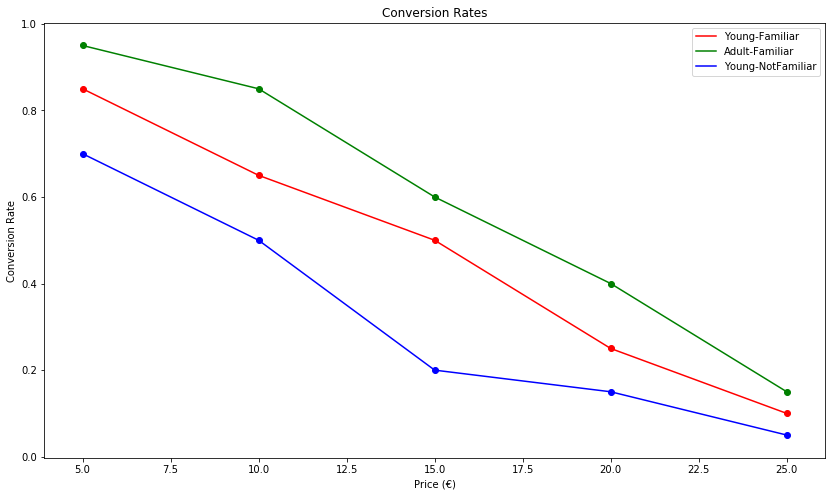

In [3]:
env = Pricing_Config_Manager(price_env_id)

plt.figure(figsize=figsize)
x = env.prices
categories = env.categories

for i in range(len(categories)):
    y = env.probabilities[i]
    smooth = interp1d(x, y, kind='cubic')
    plt.plot(x, smooth(x), color=colors[i], label = aux_dict[i])
    plt.scatter(x, y, color=colors[i])
    plt.title("Conversion Rates")
    plt.xlabel("Price (€)")
    plt.ylabel("Conversion Rate")

plt.legend()
plt.show()



## Click Functions plots
These functions return the number of clicks as the budget spent on the advertising campaign changes. As we have seen during lecture they are monotonically increasing until they reach a certain value.<br>
The function representing them is: $$m(1-e^{sx})$$
where \\(m\\) is the maximum value that the number of clicks can reach and \\(s\\) modify the slope of the curve, with \\(0 \lt s\lt1\\).

In [4]:
env = Advertising_Config_Manager(adv_env_id)

budgets = np.linspace(0, 10, num=11)
x = np.linspace(0,max(budgets), num=550)
feature_labels = env.feature_labels
phase_labels = env.phase_labels
phase_weights = env.get_phase_weights()

### Single phase


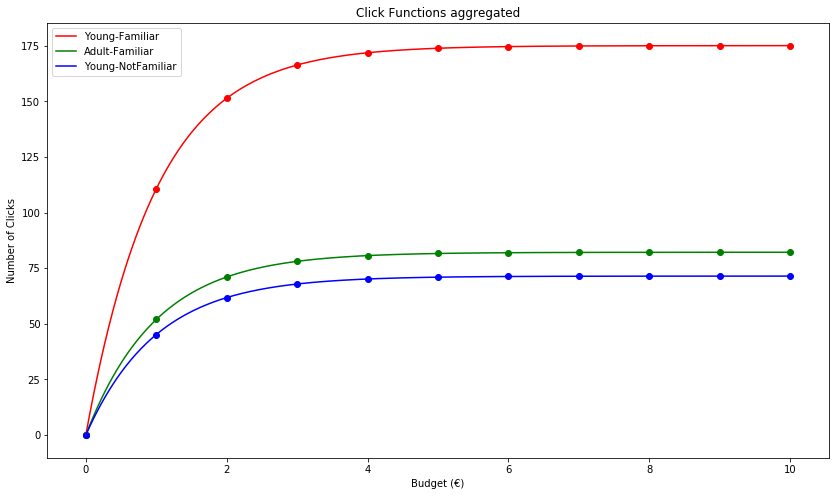

In [5]:
plt.figure(figsize=figsize)

for i,label in enumerate(feature_labels):
    y = []
    scatter = []
    for j, phase in enumerate(phase_labels):
        y.append(env.click_functions[label][j](x)*phase_weights[j])
        scatter.append(env.click_functions[label][j](budgets)*phase_weights[j])
    aggr_y = sum(y)
    aggr_scatter = sum(scatter)

    plt.plot(x, aggr_y, color=colors[i], label = label)
    plt.scatter(budgets, aggr_scatter, color=colors[i])
    plt.title("Click Functions aggregated")
    plt.xlabel("Budget (€)")
    plt.ylabel("Number of Clicks")
    plt.legend()
    

### Three Abrupt phases

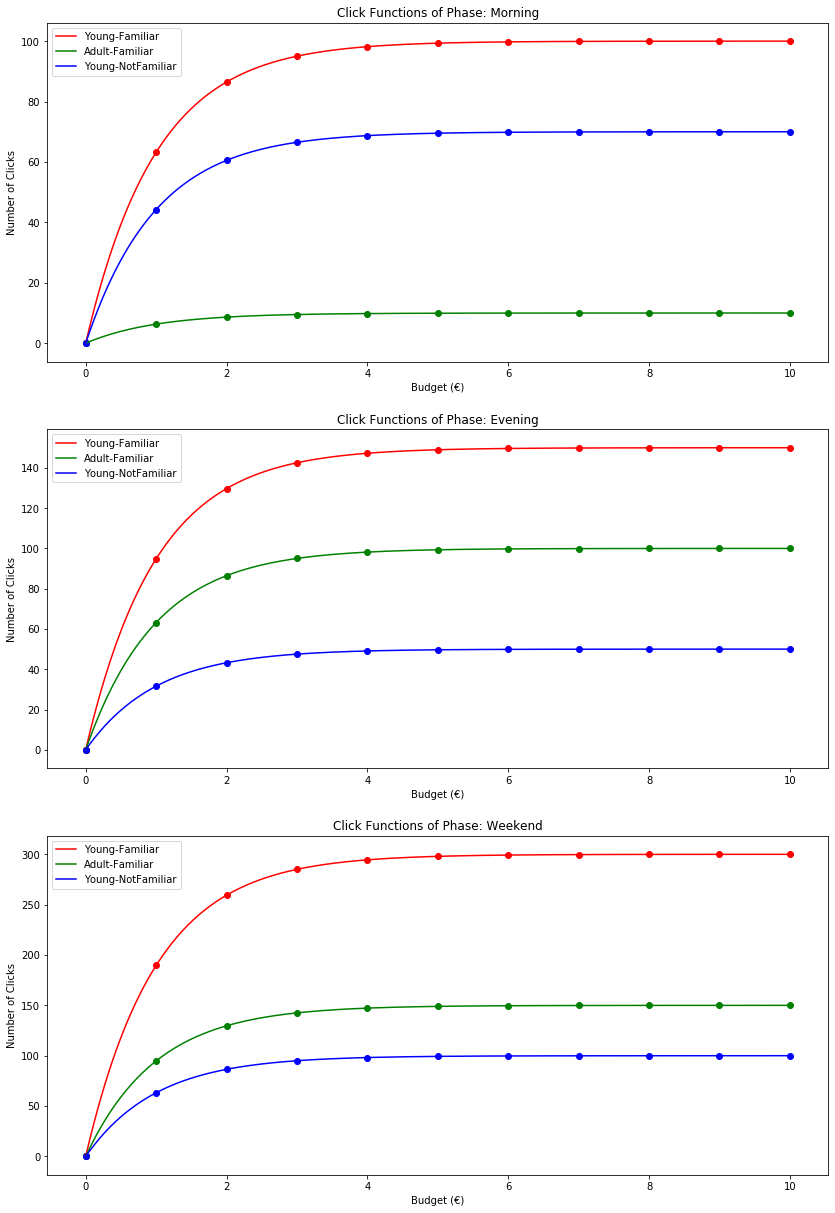

In [6]:
fig, axs = plt.subplots(3, figsize=figsize)
plt.subplots_adjust(bottom=0.5, top = 2.5)
for i,label in enumerate(feature_labels):
    for j, phase in enumerate(phase_labels):
        y = env.click_functions[label][j](x)
        scatters = env.click_functions[label][j](budgets)
        axs[j].plot(x, y, color=colors[i], label = label)
        axs[j].scatter(budgets, scatters, color=colors[i])
        axs[j].set_title("Click Functions of Phase: " +phase )
        axs[j].set_xlabel("Budget (€)")
        axs[j].set_ylabel("Number of Clicks")
        axs[j].legend()
    

In [9]:
from experiment_6 import *
from experiment_7 import *
n_experiments = 10
advertising_env_id = 0 # id of the advertising campaign to use
pricing_env_id = 0 # id of the pricing campaign to use

max_budget = 10 # maximal amount of budget
n_arms = 11 # number of equispaced values in which the budget is subdivided, starting from 0

sample_factor = 8 # number of samples in an half-day
horizon= 14 * sample_factor

import numpy as np
np.random.seed(1234)

In [3]:
n_experiments = 10
exp6 = Experiment_6(max_budget, n_arms, pricing_env_id, advertising_env_id)
exp6.run(n_experiments, horizon)

Performing experiment:  1
Performing experiment:  2
Performing experiment:  3
Performing experiment:  4
Performing experiment:  5
Performing experiment:  6
Performing experiment:  7
Performing experiment:  8
Performing experiment:  9
Performing experiment:  10


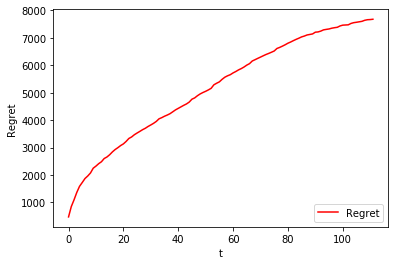

In [4]:
exp6.plot_regret()

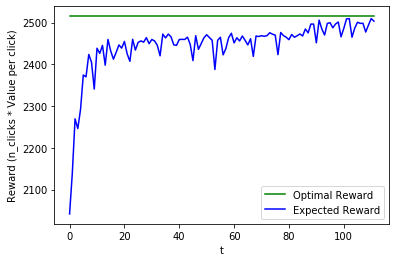

In [5]:
exp6.plot_experiment()

In [6]:
from experiment_7 import *
n_experiments = 10
exp7 = Experiment_7(max_budget, n_arms, pricing_env_id, advertising_env_id)
exp7.run(n_experiments, horizon)

Performing experiment:  1
Performing experiment:  2
Performing experiment:  3
Performing experiment:  4
Performing experiment:  5
Performing experiment:  6
Performing experiment:  7
Performing experiment:  8
Performing experiment:  9
Performing experiment:  10


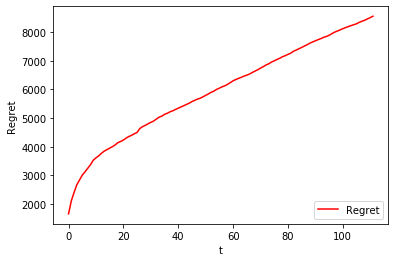

In [7]:
exp7.plot_regret()

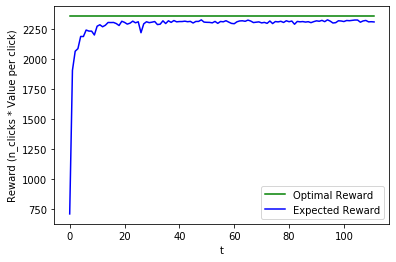

In [8]:
exp7.plot_experiment()

In [10]:
exp7 = Experiment_7(max_budget, n_arms, pricing_env_id, advertising_env_id,alt_clairvoyant=True)
exp7.run(n_experiments, horizon)

Performing experiment:  1
Performing experiment:  2
Performing experiment:  3
Performing experiment:  4
Performing experiment:  5
Performing experiment:  6
Performing experiment:  7
Performing experiment:  8
Performing experiment:  9
Performing experiment:  10


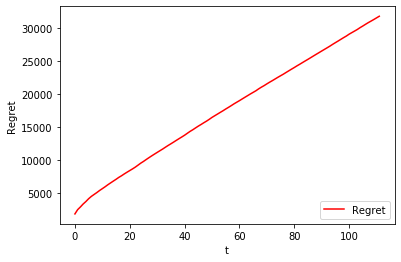

In [11]:
exp7.plot_regret()

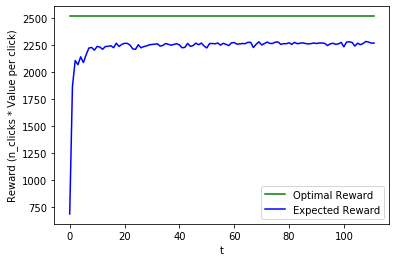

In [12]:
exp7.plot_experiment()